# Six Southern Labor Markets #2
### Race, Ethnicity, and Country of Birth

February 2, 2019

Brian Dew, @bd_econ

-----

Look at share of population that is white only (non-Hispanic), black only (non-Hispanic), Hispanic (any race), Asian only (non-Hispanic), Native American, or more than one race (non-Hispanic). Look at how it compares to national average.

Then look at what share of the population (age 0-34, age 35+) is born in the US. Identify above average foreign born populations by country of birth. 

- Chattanooga
- Knoxville
- Greenville
- Asheville
- Kingsport
- Huntsville
- US total

In [1]:
import pandas as pd
import numpy as np
import pickle
import os

import matplotlib.pyplot as plt

In [2]:
areas = [('Chattanooga-\nCleveland-\nDalton, TN-GA', 'CSA', [174]),
         ('Greenville-\nAnderson-\nSpartanburg, SC', 'CSA', [273]),
         ('Asheville, NC', 'CBSA', [11700]),
         ('Johnson City-\nKingsport-\nBristol, TN-VA', 'CSA', [304]),
         ('Huntsville, AL', 'CBSA', [26620]),
         ('Knoxville, TN', 'CBSA', [28940])]

area_names = [area[0] for area in areas]

In [3]:
csa = [area[2][0] for area in areas if area[1] == 'CSA']
cbsa = [area[2][0] for area in areas if area[1] == 'CBSA']
grps = [('Six areas combined', 'CSA in @csa or CBSA in @cbsa'),
        ('Other south', 'REGION == "South" and CSA not in @csa and CBSA not in @cbsa'),
        ('Other US', 'CSA not in @csa and CBSA not in @cbsa'),
        ('US Total', 'AGE > -1')]
grps2 = [(area[0], f'{area[1]} == {area[2][0]}') for area in areas]
groups = grps2 + grps

### Race/Ethnicity/Foreign Born Share of Population

In [4]:
# CPS data
os.chdir('/home/brian/Documents/CPS/data/clean')

# Subset of columns of interest
columns = ['MONTH', 'YEAR', 'CBSA', 'CSA', 'AGE', 'STATE', 'REGION',
           'WBHAOM', 'FORBORN', 'CTYBIRTH', 'PWSSWGT', 'EDUC']

df = pd.concat([pd.read_feather(f'cps{year}.ft', columns=columns)
                for year in [2017, 2018]])

In [5]:
results = pd.DataFrame()
for group in groups:
    data = df.query(group[1])
    i = data.groupby('FORBORN').PWSSWGT.sum()
    results.at[group[0], 'Foreign born'] = (i / data.PWSSWGT.sum())[1] * 100
    u35 = data.query('AGE < 35')
    i = u35.groupby('FORBORN').PWSSWGT.sum()
    u35tot = u35.PWSSWGT.sum()
    results.at[group[0], 'Foreign born, under age 35'] = (i / u35tot)[1] * 100
    o34 = data.query('AGE >= 35')
    i = o34.groupby('FORBORN').PWSSWGT.sum()
    o34tot = o34.PWSSWGT.sum()
    results.at[group[0], 'Foreign born, over age 34'] = (i / o34tot)[1] * 100
    lths = data.query('EDUC == "LTHS"')
    i = lths.groupby('FORBORN').PWSSWGT.sum()
    lthstot = lths.PWSSWGT.sum()
    results.at[group[0], 'Foreign born, LTHS'] = (i / lthstot)[1] * 100
    adv = data.query('EDUC == "ADV"')
    i = adv.groupby('FORBORN').PWSSWGT.sum()
    advtot = adv.PWSSWGT.sum()
    results.at[group[0], 'Foreign born, ADV'] = (i / advtot)[1] * 100
    # Race/ethnicity
    i = data.groupby('WBHAOM').PWSSWGT.sum()
    s = ((i / data.PWSSWGT.sum()) * 100)
    for idx, val in s.iteritems():
        results.at[group[0], idx] = val
    # Children of more than one race
    data = data.query('AGE < 16')
    i = data.groupby('WBHAOM').PWSSWGT.sum()
    s = ((i / data.PWSSWGT.sum())['Mixed'] * 100)
    results.at[group[0], 'More than one race, under age 16'] = s

In [6]:
results

,Foreign born,"Foreign born, under age 35","Foreign born, over age 34","Foreign born, LTHS","Foreign born, ADV",Asian,Black,Hispanic,Mixed,Native American,White,"More than one race, under age 16"
"Chattanooga-\nCleveland-\nDalton, TN-GA",3.956363,3.690821,4.178084,8.027546,14.386751,1.287174,11.775587,4.450256,2.412618,0.144300,79.930069,5.208514
"Greenville-\nAnderson-\nSpartanburg, SC",6.449598,5.740967,7.033713,16.818953,13.507406,2.254295,18.940552,6.547762,2.659896,0.215920,69.381569,5.938308
"Asheville, NC",6.116752,6.390652,5.959113,11.188997,6.102176,1.021360,9.031936,4.727745,0.612907,0.175493,84.430557,0.817542
"Johnson City-\nKingsport-\nBristol, TN-VA",4.434132,3.633254,5.027794,5.125551,3.700202,2.874233,2.497091,3.099631,0.919521,0.299766,90.309753,2.828911
"Huntsville, AL",5.943191,3.793816,7.789201,9.461585,10.965991,3.493052,19.688280,6.228296,1.210378,0.219911,69.160088,2.186539
"Knoxville, TN",5.688831,5.069152,6.172569,12.342358,9.569640,1.694245,5.960498,3.825293,1.141668,0.452399,86.925903,2.481213
Six areas combined,5.519925,4.816489,6.069789,11.752769,10.293519,2.043856,12.224170,5.005259,1.741920,0.254771,78.730026,3.936860
Other south,12.661676,8.812412,15.974896,24.393229,17.952229,3.861681,19.137390,18.801723,1.849179,0.775904,55.574142,3.810400
Other US,13.844942,9.095591,17.872123,27.839407,19.166583,6.149519,12.311587,18.433498,1.983756,0.793685,60.327942,4.198962
US Total,13.731788,9.039947,17.705825,27.626881,19.055945,6.093715,12.310404,18.250980,1.980470,0.786360,60.578091,4.195616


### Countries of Origin

Four year sample

In [7]:
# Subset of columns of interest
columns = ['MONTH', 'YEAR', 'CBSA', 'CSA', 'STATE', 'REGION', 'AGE',
           'CTYBIRTH', 'PWSSWGT']

df = pd.concat([pd.read_feather(f'cps{year}.ft', columns=columns)
                for year in [2015, 2016, 2017, 2018]])

In [8]:
results2 = pd.DataFrame()
for group in groups:
    data = df.query(group[1])
    i = data.groupby('CTYBIRTH').PWSSWGT.sum()
    s = (i / data.PWSSWGT.sum()) * 100 
    for idx, val in s.iteritems():
        results2.at[idx, group[0]] = val
    print(group[0])
    print(s.drop('United States', axis=0).sort_values(ascending=False).head(5))

Chattanooga-
Cleveland-
Dalton, TN-GA
CTYBIRTH
Mexico       1.134609
Guatemala    0.562051
Germany      0.374133
Venezuela    0.321977
Canada       0.268913
Name: PWSSWGT, dtype: float32
Greenville-
Anderson-
Spartanburg, SC
CTYBIRTH
Mexico     1.784016
Russia     0.572533
India      0.465673
Germany    0.276223
China      0.243900
Name: PWSSWGT, dtype: float32
Asheville, NC
CTYBIRTH
Mexico         2.377840
Philippines    0.557064
Canada         0.455758
Jamaica        0.436239
England        0.303723
Name: PWSSWGT, dtype: float32
Johnson City-
Kingsport-
Bristol, TN-VA
CTYBIRTH
Vietnam        0.528996
Mexico         0.500919
Philippines    0.484111
Germany        0.323473
China          0.260924
Name: PWSSWGT, dtype: float32
Huntsville, AL
CTYBIRTH
Mexico         1.631175
Germany        0.729689
Philippines    0.492417
India          0.408426
Nigeria        0.321376
Name: PWSSWGT, dtype: float32
Knoxville, TN
CTYBIRTH
Mexico      0.942670
India       0.714927
Honduras    0.362304
Germ

In [9]:
ustot = results2.iloc[:,-3]
s6 = results2.iloc[:,0:-4]
diff = s6.sub(ustot, axis=0)

In [10]:
diff[diff > 0.2].dropna(how='all')

,"Chattanooga- Cleveland- Dalton, TN-GA","Greenville- Anderson- Spartanburg, SC","Asheville, NC","Johnson City- Kingsport- Bristol, TN-VA","Huntsville, AL","Knoxville, TN"
Canada,NaN,NaN,0.278628,NaN,NaN,NaN
Germany,NaN,NaN,NaN,NaN,0.398069,NaN
Guatemala,0.259360,NaN,NaN,NaN,NaN,NaN
Philippines,NaN,NaN,0.266393,NaN,0.201746,NaN
Russia,NaN,0.489637,NaN,NaN,NaN,NaN
Sudan,NaN,NaN,NaN,NaN,NaN,0.305638
Turkey,NaN,NaN,NaN,NaN,NaN,0.200524
United States,8.493362,7.194580,7.893875,9.905449,6.890633,8.093834


In [11]:
os.chdir('/home/brian/Documents/blog_posts/Southern_Six/')

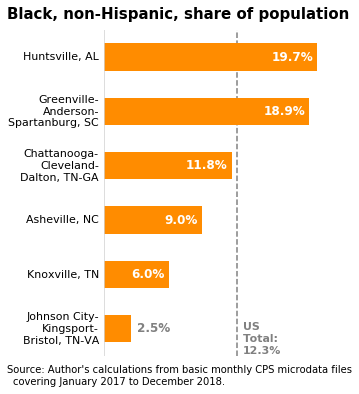

In [12]:
# Bar chart showing under 16 share of population
d = (results.loc[[g[0] for g in grps2], 'Black']
              .sort_values())

d_us = results.loc['US Total', 'Black']

d.plot(kind='barh', color='darkorange', figsize=[4, 6], width=0.5, zorder=2)
for i, val in enumerate(d):
    if val > 10:
        x_val = val - 4.2
        color = 'white'
    elif val > 5:
        x_val = val - 3.5
        color = 'white'
    else:
        color = 'gray'
        x_val = val + 0.5
    text_val = f'{round(val, 1)}%'
    y_val = i - 0.06
    plt.text(x_val, y_val, text_val, color=color, fontsize=12, weight='bold')
    plt.text(-0.5, i, d.index[i], ha='right', va='center', fontsize=11)

plt.axvline(x=d_us, color='gray', linestyle='--', zorder=1)
plt.text(d_us * 1.04, -0.45, f"US\nTotal:\n{round(d_us, 1)}%", 
         fontsize=11, color='gray', weight='bold')
    
plt.axvline(x=0, color='lightgray')    

# add title and footer
plt.text(-9, 5.7, 'Black, non-Hispanic, share of population', 
          fontsize=15, weight='bold')

plt.text(-9, -0.8, "Source: Author's calculations from basic monthly CPS microdata files")
plt.text(-8.5, -1.03, 'covering January 2017 to December 2018.')

plt.axis('off')

plt.savefig('black.png', bbox_inches='tight');

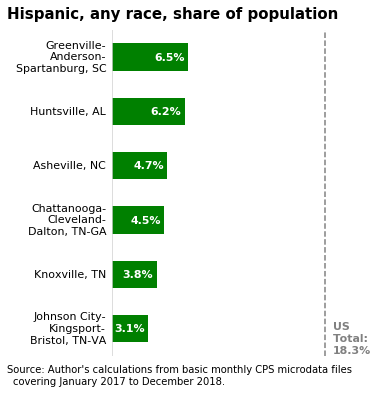

In [13]:
# Bar chart showing under 16 share of population
d = (results.loc[[g[0] for g in grps2], 'Hispanic']
              .sort_values())

d_us = results.loc['US Total', 'Hispanic']

d.plot(kind='barh', color='green', figsize=[4, 6], width=0.5, zorder=2)
for i, val in enumerate(d):
    x_val = val - 2.9
    text_val = f'{round(val, 1)}%'
    y_val = i - 0.06
    plt.text(x_val, y_val, text_val, color='white', fontsize=11, weight='bold')
    plt.text(-0.5, i, d.index[i], ha='right', va='center', fontsize=11)

plt.axvline(x=d_us, color='gray', linestyle='--', zorder=1)
plt.text(d_us * 1.04, -0.45, f"US\nTotal:\n{round(d_us, 1)}%", 
         fontsize=11, color='gray', weight='bold')
    
plt.axvline(x=0, color='lightgray')    

# add title and footer
plt.text(-9, 5.7, 'Hispanic, any race, share of population', 
          fontsize=15, weight='bold')

plt.text(-9, -0.8, "Source: Author's calculations from basic monthly CPS microdata files")
plt.text(-8.5, -1.03, 'covering January 2017 to December 2018.')

plt.axis('off')

plt.savefig('Hispanic.png', bbox_inches='tight');

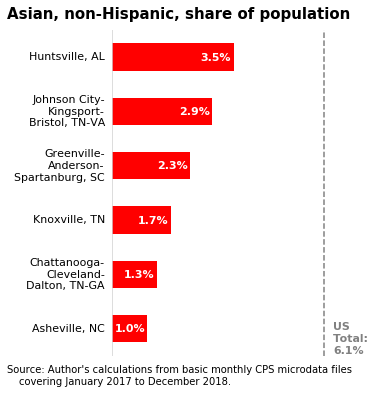

In [14]:
# Bar chart showing under 16 share of population
d = (results.loc[[g[0] for g in grps2], 'Asian']
              .sort_values())

d_us = results.loc['US Total', 'Asian']

d.plot(kind='barh', color='red', figsize=[4, 6], width=0.5, zorder=2)
for i, val in enumerate(d):
    x_val = val - 0.95
    text_val = f'{round(val, 1)}%'
    y_val = i - 0.06
    plt.text(x_val, y_val, text_val, color='white', fontsize=11, weight='bold')
    plt.text(-0.2, i, d.index[i], ha='right', va='center', fontsize=11)

plt.axvline(x=d_us, color='gray', linestyle='--', zorder=1)
plt.text(d_us * 1.04, -0.45, f"US\nTotal:\n{round(d_us, 1)}%", 
         fontsize=11, color='gray', weight='bold')
    
plt.axvline(x=0, color='lightgray')    

# add title and footer
plt.text(-3, 5.7, 'Asian, non-Hispanic, share of population', 
          fontsize=15, weight='bold')

plt.text(-3, -0.8, "Source: Author's calculations from basic monthly CPS microdata files")
plt.text(-2.65, -1.03, 'covering January 2017 to December 2018.')

plt.axis('off')

plt.savefig('Asian.png', bbox_inches='tight');

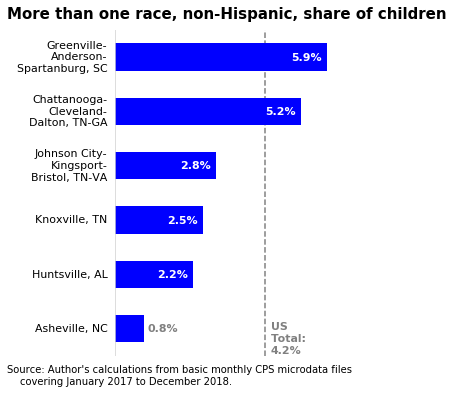

In [15]:
# Bar chart showing under 16 share of population
d = (results.loc[[g[0] for g in grps2], 'More than one race, under age 16']
              .sort_values())

d_us = results.loc['US Total', 'More than one race, under age 16']

d.plot(kind='barh', color='blue', figsize=[4, 6], width=0.5, zorder=2)
for i, val in enumerate(d):
    if val > 1:
        x_val = val - 1.0
        color = 'white'
    else:
        color = 'gray'
        x_val = val + 0.1
    text_val = f'{round(val, 1)}%'
    y_val = i - 0.06
    plt.text(x_val, y_val, text_val, color=color, fontsize=11, weight='bold')
    plt.text(-0.2, i, d.index[i], ha='right', va='center', fontsize=11)

plt.axvline(x=d_us, color='gray', linestyle='--', zorder=1)
plt.text(d_us * 1.04, -0.45, f"US\nTotal:\n{round(d_us, 1)}%", 
         fontsize=11, color='gray', weight='bold')
    
plt.axvline(x=0, color='lightgray')    

# add title and footer
plt.text(-3, 5.7, 'More than one race, non-Hispanic, share of children', 
          fontsize=15, weight='bold')

plt.text(-3, -0.8, "Source: Author's calculations from basic monthly CPS microdata files")
plt.text(-2.65, -1.03, 'covering January 2017 to December 2018.')

plt.axis('off')

plt.savefig('More_than_one_race.png', bbox_inches='tight');

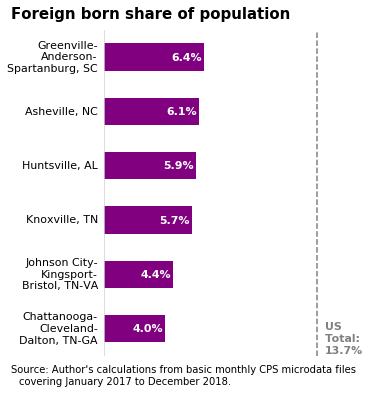

In [16]:
# Bar chart showing under 16 share of population
d = (results.loc[[g[0] for g in grps2], 'Foreign born']
              .sort_values())

d_us = results.loc['US Total', 'Foreign born']

d.plot(kind='barh', color='purple', figsize=[4, 6], width=0.5, zorder=2)
for i, val in enumerate(d):
    x_val = val - 2.1
    text_val = f'{round(val, 1)}%'
    y_val = i - 0.06
    plt.text(x_val, y_val, text_val, color='white', fontsize=11, weight='bold')
    plt.text(-0.4, i, d.index[i], ha='right', va='center', fontsize=11)

plt.axvline(x=d_us, color='gray', linestyle='--', zorder=1)
plt.text(d_us * 1.04, -0.45, f"US\nTotal:\n{round(d_us, 1)}%", 
         fontsize=11, color='gray', weight='bold')
    
plt.axvline(x=0, color='lightgray')    

# add title and footer
plt.text(-6, 5.7, 'Foreign born share of population', 
          fontsize=15, weight='bold')

plt.text(-6, -0.8, "Source: Author's calculations from basic monthly CPS microdata files")
plt.text(-5.5, -1.03, 'covering January 2017 to December 2018.')

plt.axis('off')

plt.savefig('Foreign_born.png', bbox_inches='tight');